In [1]:
import os
wd = os.getcwd()
wd = os.path.dirname(os.path.dirname(wd))
import sys
sys.path.append(wd+"\\src\\")

In [2]:
from tube import InterpXY,Tube,BorderSimple
from math import *
import numpy as np
from powderlayer import PowderBD, PowderOvLayer, Powder
from gaslayer import GasEOS, GasLayer
from pistonlayer import ElPistEOS, ElPistLayer
import pprint as pp

In [5]:
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets
mpl.rcParams['figure.figsize'] = (5,3) 

import json
from functional import seq

In [9]:
with open(wd+"\\src\\" + 'gpowders.json') as f:
    all_powders = json.load(f)
all_powders.keys()

dict_keys(['СФ 033', 'ВУ фл', 'ВТ', 'ВТМ', 'ВТХ-10', 'ВТХ-20', 'ВТД-25', '4\\1', '4\\1 фл', '4\\7', '4\\7 св', '4\\7 фл ВБП', '4\\7 ПТ-3 фл', '4\\7 Ц гр', '5\\1', '5\\1 х-10', '5\\1 х-20', '5\\1 д-20', '5\\1 д-25', '5\\7 св', '5\\7 н\\а', '5\\7 в\\а', '5\\7 Ц фл', '6\\7 гр', '6\\7 БП гр', '6\\7 фл В БП', '6\\7 П-5 БП фл', '6\\7 фл ', '7\\1', '7\\1 фл БП', '7\\7', '7\\14', '7\\1 УГ', '8\\1 тр', '8\\7', '8\\1 УГ', '9\\7', '9\\7 МН', '9\\7 БП', '11\\1 БП', '11\\7', '11\\1 УГ', '12\\1 Тр', '12\\1 тр БП', '12\\1 тр МН', '12\\7', '12\\7 В\\А', '12\\1 УГ', '14\\1 тр В\\А', '14\\7', '14\\7 В\\А', '14\\7 БП', '15\\1 тр В\\А', '15\\7', '16\\1 тр', '16\\1 тр В\\А', '17\\7', '18\\1 тр', '18\\1 тр БП', '22\\1 тр', '22\\7', '23\\7', '28\\1 тр', '37\\1 тр', 'НДТ-3 16\\1', 'НДТ-3 18\\1', 'НДТ-3 19\\1', 'НДТ-3 23\\1', 'НДТ-3 32\\1', 'НДТ-3 152\\57', 'ДГ-2 15\\1', 'ДГ-2 17\\1', 'ДГ-3 13\\1', 'ДГ-3 14\\1', 'ДГ-3 17\\1', 'ДГ-3 18\\1', 'ДГ-3 20\\1', 'ДГ-3 23\\1', 'ДГ-4 13\\1', '100\\56', '100\\70', '130\\5

In [16]:
tps = sorted([(I_k, k) for k, d in all_powders.items() if isinstance(I_k:=d['I_k'], float) and I_k > 0.1])
good_marks = [name for I_k, name in tps]
I_ks = [I_k for I_k, name in tps]

In [17]:
tps

[(0.15, 'ВУ фл'),
 (0.17, 'СФ 033'),
 (0.22, 'ВТ'),
 (0.23, 'ВТМ'),
 (0.25, '5\\1'),
 (0.27, 'ВТХ-10'),
 (0.28, '4\\7 ПТ-3 фл'),
 (0.3, '4\\1'),
 (0.3, '4\\7 Ц гр'),
 (0.32, '4\\7'),
 (0.32, '5\\7 н\\а'),
 (0.33, '4\\7 св'),
 (0.35, '5\\7 Ц фл'),
 (0.35, '5\\7 св'),
 (0.37, '5\\7 в\\а'),
 (0.38, '4\\7 фл ВБП'),
 (0.39, 'ВТХ-20'),
 (0.4, '4\\1 фл'),
 (0.4, '7\\14'),
 (0.43, '6\\7 фл '),
 (0.43, '6\\7 фл В БП'),
 (0.45, 'ВТД-25'),
 (0.48, '6\\7 П-5 БП фл'),
 (0.5, '5\\1 х-10'),
 (0.5, '6\\7 гр'),
 (0.5, '7\\1'),
 (0.5, '7\\7'),
 (0.5, '8\\7'),
 (0.51, '7\\1 фл БП'),
 (0.56, '6\\7 БП гр'),
 (0.6, '9\\7'),
 (0.68, '11\\7'),
 (0.68, '5\\1 д-20'),
 (0.7, '5\\1 х-20'),
 (0.7, '8\\1 тр'),
 (0.72, '12\\7 В\\А'),
 (0.76, '9\\7 МН'),
 (0.81, '12\\7'),
 (0.82, '5\\1 д-25'),
 (0.83, '14\\7 В\\А'),
 (0.84, '14\\1 тр В\\А'),
 (0.87, '12\\1 Тр'),
 (0.88, '12\\1 тр МН'),
 (0.9, '7\\1 УГ'),
 (0.9, 'ДГ-4 13\\1'),
 (0.91, '15\\1 тр В\\А'),
 (0.93, '15\\7'),
 (0.94, '9\\7 БП'),
 (0.96, '14\\7'),
 (1.0, '8\

In [278]:
from opti.Chromosome import DRange, SRange,ChromoController
from zone import Zone

In [ ]:
L1 = DRange(2,6,'L1')
L2 = DRange(1,4,'L2')
Lcone = DRange(0,3,2.5,'Lcone')


d2 = DRange(0.085,0.125, 'd2') 


In [281]:
d = {
    'id': 'some_id',
    'tube_points': [[0.0, 0.125], [5.0, 0.125]],
    'layers': [
        {
            'type': 'gas',
            'x_1': 0,
            
        }
    ],
    'borders': []
    
}

In [282]:
def forward_foo(d):
    t = Tube.get_standart({'tube_points': d['tube_points']})
    print(t)
    
    return {'id': d['id']}
forward_foo(d)

Tube(xs=[0.0, 5.0], ds=[0.125, 0.125])


-0.5773502691896257 4.309401076758503
-0.5773502691896257 6.773502691896257


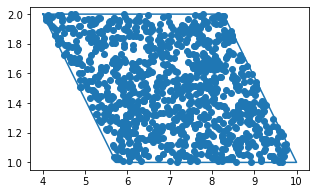

-0.2679491924311227 3.071796769724491
-0.2679491924311227 3.679491924311227


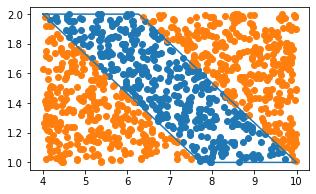

[]

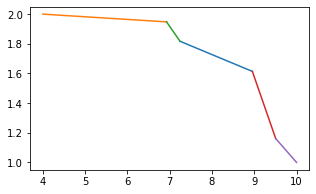

In [153]:
rnd.uniform(1,10)

9.253471561030084

In [4]:
from distributed import Client

cl = Client('172.16.49.81:8786')
cl

Client Scheduler: tcp://172.16.49.81:8786 Dashboard: http://172.16.49.81:8787/status,Cluster Workers: 123 Cores: 123 Memory: 198.77 GB


distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
